In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
insurance=pd.read_csv("C:/Users/Anirudh/Python projects/new_insurance_data.csv")

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


# EDA

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [9]:
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [10]:
np.mean(insurance['bmi'])

30.665112359550562

In [11]:
insurance.shape

(1338, 13)

In [12]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [17]:
#replacing categorical null values with mode and numerical with mean
for i in insurance.columns:
    if insurance[i].dtype=="object":
        insurance[i].fillna(insurance[i].mode()[0],inplace=True)
    else:
        insurance[i].fillna(insurance[i].mean(),inplace=True)

In [18]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [21]:
#checking duplicates
insurance.duplicated().sum()

0

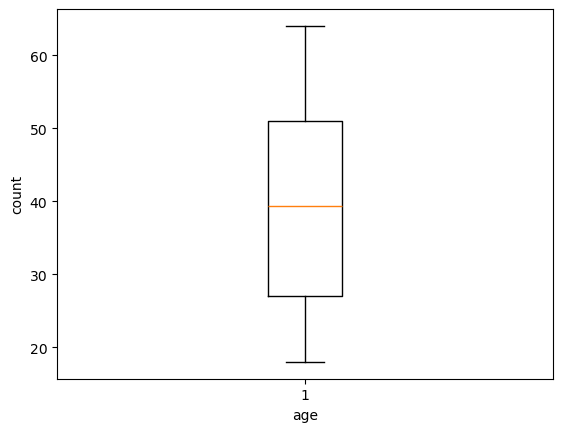

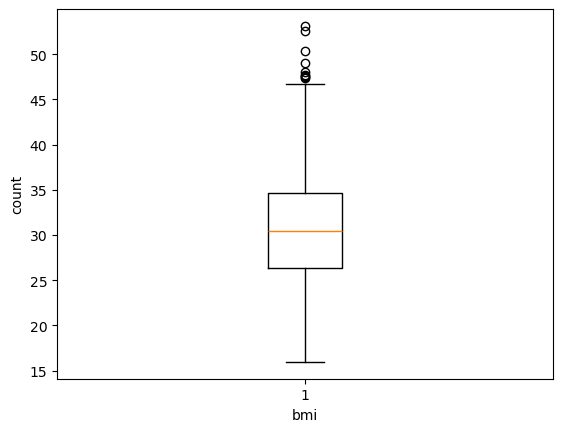

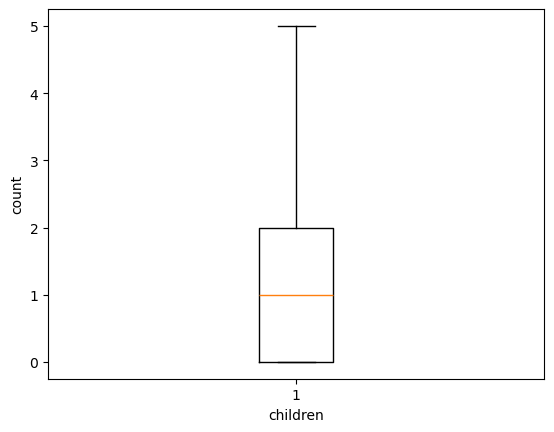

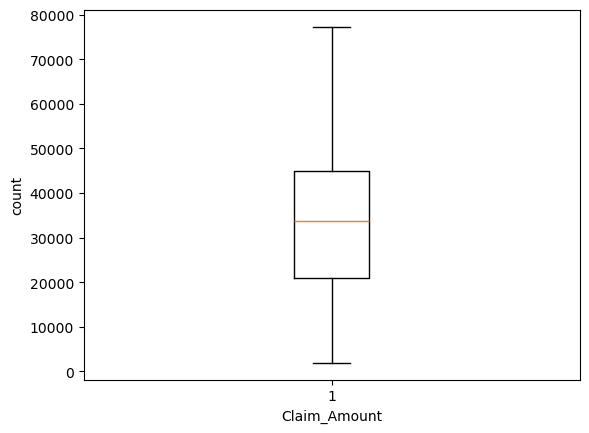

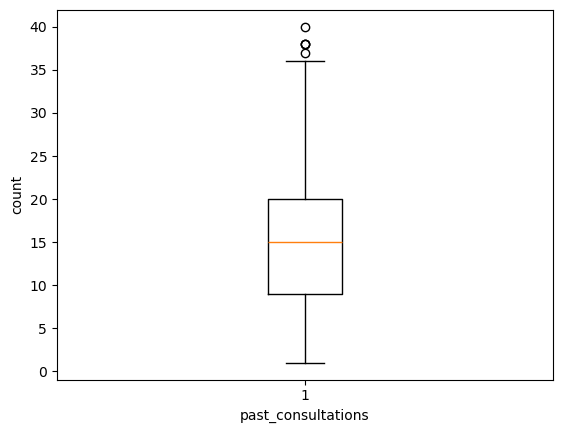

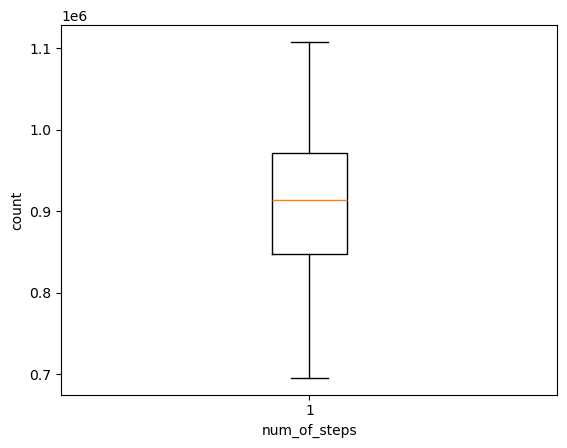

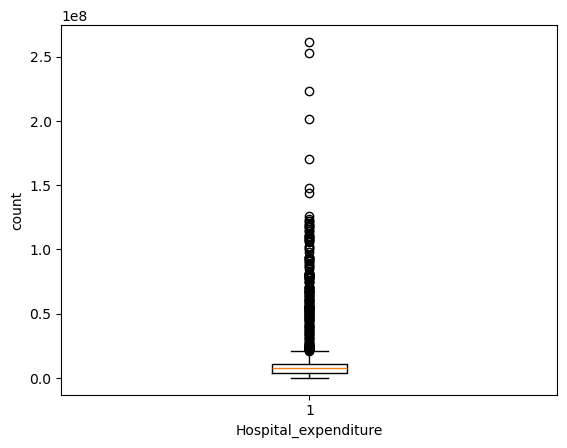

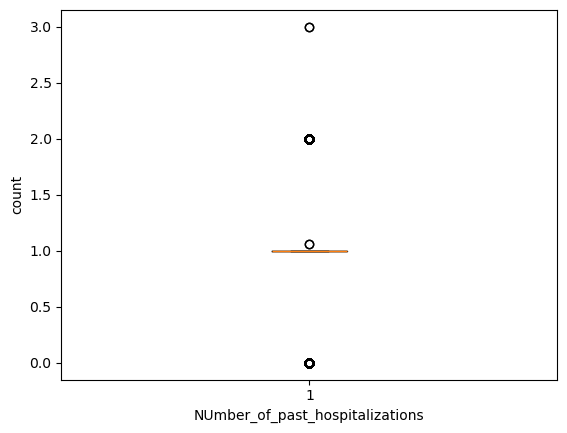

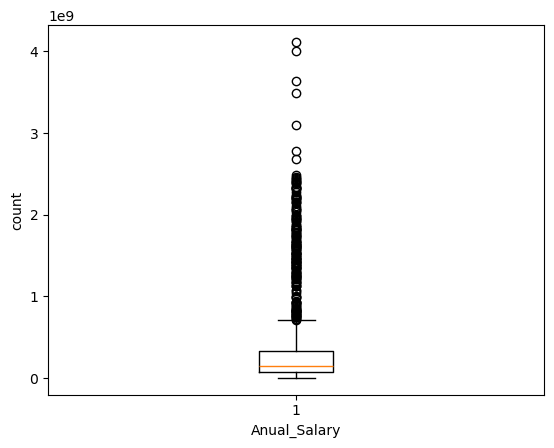

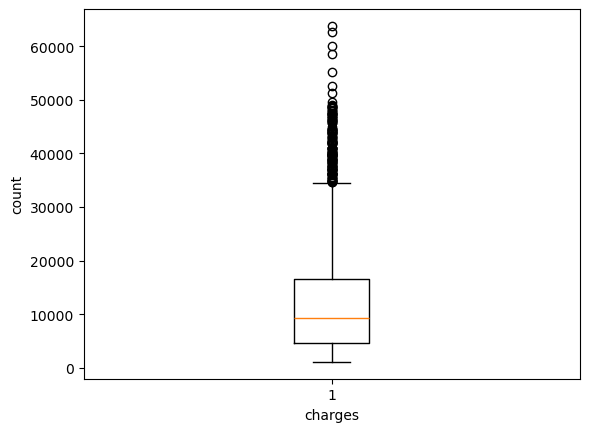

In [28]:
#check outliers

for col in insurance.columns:
    if(insurance[col].dtypes=="int64" or insurance[col].dtypes=="float64"):
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()
        

In [32]:
#treating outliers
q1=insurance.bmi.quantile(0.25)
q3=insurance.bmi.quantile(0.75)

In [31]:
q1

26.315

In [33]:
iqr=q3-q1

In [34]:
print(iqr)

8.341249999999999


In [35]:
#so the range to be accepted

minrange=q1-1.5*iqr
maxrange=q3+1.5*iqr

In [37]:
# the columns to be dropped after observing the box plot is 
insurance=insurance[(insurance.bmi >=q1-1.5*iqr) & (insurance.bmi <= q3+1.5*iqr)]

In [40]:
q1=insurance.past_consultations.quantile(0.25)
q3=insurance.past_consultations.quantile(0.75)
iqr=q3-q1
insurance=insurance[(insurance.past_consultations >=q1-1.5*iqr) & (insurance.past_consultations <= q3+1.5*iqr)]


q1=insurance.Hospital_expenditure.quantile(0.25)
q3=insurance.Hospital_expenditure.quantile(0.75)
iqr=q3-q1
insurance=insurance[(insurance.Hospital_expenditure >=q1-1.5*iqr) & (insurance.Hospital_expenditure <= q3+1.5*iqr)]

q1=insurance.Anual_Salary.quantile(0.25)
q3=insurance.Anual_Salary.quantile(0.75)
iqr=q3-q1
insurance=insurance[(insurance.Anual_Salary >=q1-1.5*iqr) & (insurance.Anual_Salary <= q3+1.5*iqr)]


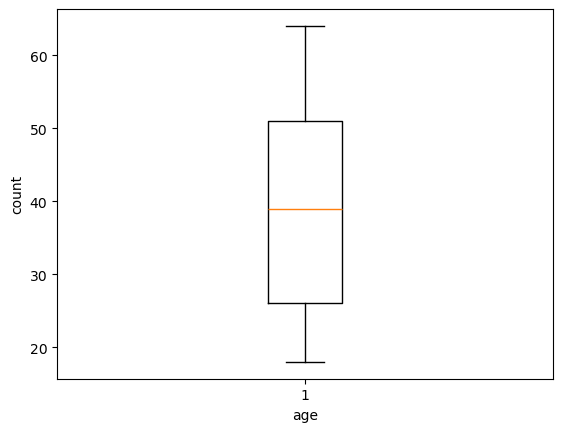

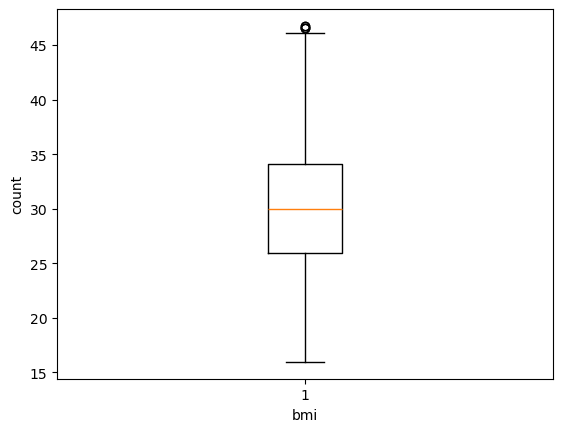

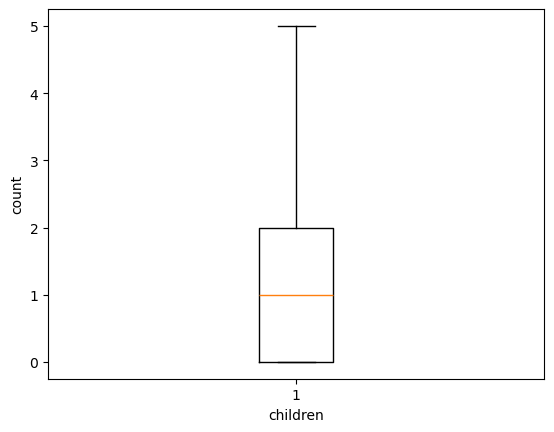

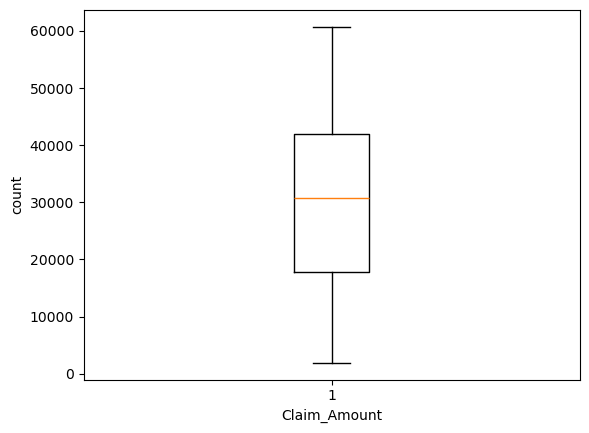

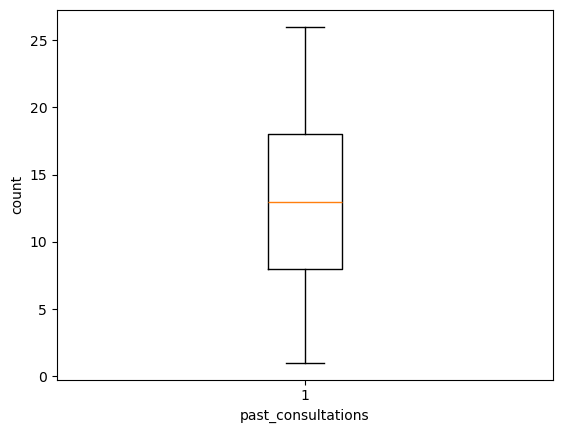

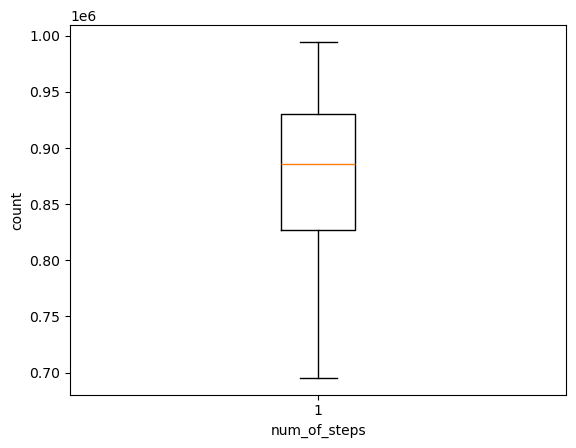

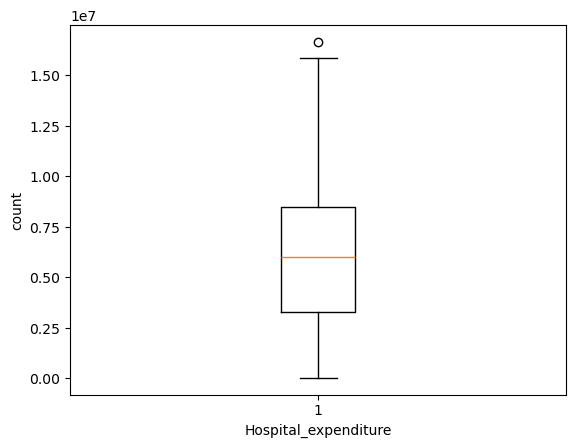

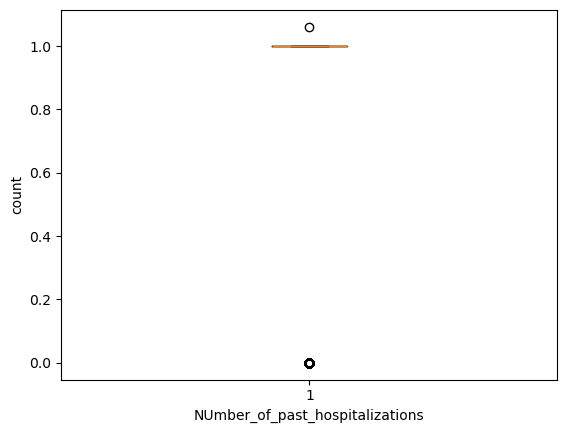

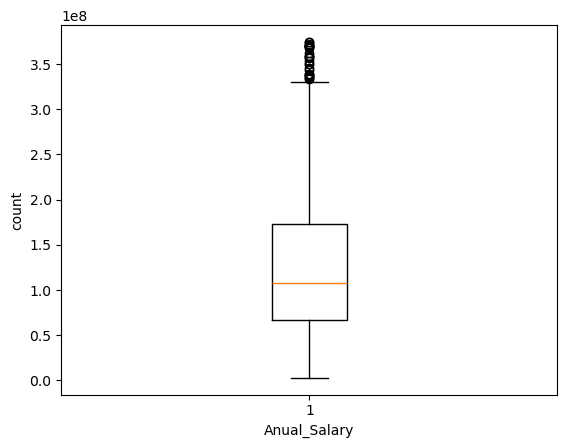

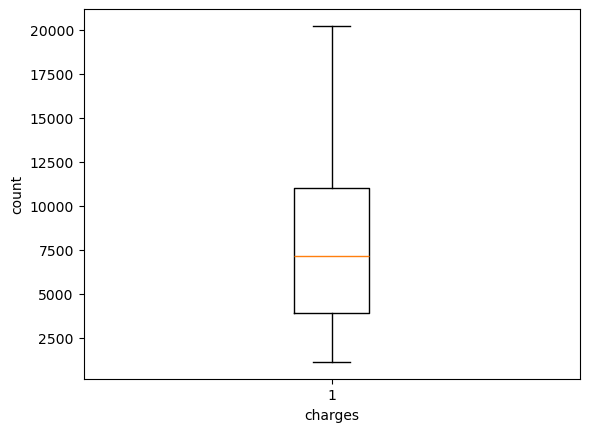

In [41]:
#VERIFYING IF OUTLIERS ARE REMOVED
for col in insurance.columns:
    if(insurance[col].dtypes=="int64" or insurance[col].dtypes=="float64"):
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

In [42]:
insurance["NUmber_of_past_hospitalizations"].value_counts()

NUmber_of_past_hospitalizations
1.000000    876
0.000000    148
1.060629      1
Name: count, dtype: int64

# Feature Selection

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]

for col in insurance.columns:

    if(insurance[col].dtype!="object") & (col!="charges"):
        col_list.append(col)

X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)
                                    

                           feature        VIF
0                              age  15.843292
1                              bmi  26.254360
2                         children   2.029727
3                     Claim_Amount   5.658371
4               past_consultations   6.221689
5                     num_of_steps  61.238400
6             Hospital_expenditure   5.161339
7  NUmber_of_past_hospitalizations  12.002015
8                     Anual_Salary   5.595154


In [48]:
insurance=insurance.drop(["num_of_steps"],axis=1)

In [49]:
#vif method is used to understand the most important columns here num_steps is highly correlted hencewe will drop 

col_list=[]

for col in insurance.columns:

    if(insurance[col].dtype!="object") & (col!="charges"):
        col_list.append(col)

X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  14.890043
1                              bmi  12.240954
2                         children   2.017735
3                     Claim_Amount   5.225668
4               past_consultations   5.807256
5             Hospital_expenditure   4.890602
6  NUmber_of_past_hospitalizations  10.644865
7                     Anual_Salary   5.493253


In [50]:
insurance=insurance.drop(["age"],axis=1)

In [51]:
col_list=[]

for col in insurance.columns:

    if(insurance[col].dtype!="object") & (col!="charges"):
        col_list.append(col)

X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              bmi  10.375579
1                         children   1.979830
2                     Claim_Amount   5.207453
3               past_consultations   5.786416
4             Hospital_expenditure   4.890598
5  NUmber_of_past_hospitalizations   8.310876
6                     Anual_Salary   4.729083


In [52]:
insurance=insurance.drop(["bmi"],axis=1)

In [53]:
col_list=[]

for col in insurance.columns:

    if(insurance[col].dtype!="object") & (col!="charges"):
        col_list.append(col)

X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                           feature       VIF
0                         children  1.977411
1                     Claim_Amount  4.533417
2               past_consultations  5.015873
3             Hospital_expenditure  4.441670
4  NUmber_of_past_hospitalizations  7.301695
5                     Anual_Salary  4.705283


In [54]:
insurance=insurance.drop(["NUmber_of_past_hospitalizations"],axis=1)

In [55]:
#now all the columns has vif less than 5 hence all this are importat for us
col_list=[]

for col in insurance.columns:

    if(insurance[col].dtype!="object") & (col!="charges"):
        col_list.append(col)

X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0              children  1.710679
1          Claim_Amount  4.154689
2    past_consultations  4.647220
3  Hospital_expenditure  4.264873
4          Anual_Salary  4.261439


In [57]:
X=insurance.loc[:,["children","Claim_Amount","past_consultations","Hospital_expenditure","Anual_Salary"]]

In [58]:
Y=insurance.loc[:,"charges"]

In [59]:
X

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1041,0.0,27184.27803,9.0,1.266673e+07,3.743228e+08
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [60]:
Y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1041    18955.22017
1046    19107.77960
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1025, dtype: float64

# Splitting of the dataset

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [68]:
X_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
841,0.0,31405.793590,12.0,9380140.579,2.118739e+08
138,0.0,29979.119780,21.0,8026175.962,9.187363e+07
536,3.0,33660.785440,13.0,2746996.417,8.752788e+07
497,2.0,7182.350763,4.0,4433379.902,7.752061e+07
246,0.0,14551.952260,8.0,8605220.762,9.709559e+07
...,...,...,...,...,...
705,0.0,10803.528310,7.0,2417441.859,1.777211e+08
72,1.0,5987.151966,16.0,4803503.549,1.125432e+07
107,0.0,47182.737540,13.0,7160946.862,2.193514e+07
272,2.0,45727.874650,14.0,2343557.299,5.146269e+07


In [66]:
Y_train

416     5846.91760
152     2527.81865
815    11566.30055
643     8964.06055
917    13228.84695
          ...     
705     9875.68040
72      1832.09400
107     2138.07070
272     4058.11610
866    12333.82800
Name: charges, Length: 307, dtype: float64

# Training

In [69]:
l_model=LinearRegression()

In [71]:
l_model.fit(X_train,Y_train)

LinearRegression()

In [74]:
predictions=l_model.predict(X_test)

In [77]:
predictions

array([ 5514.93222095,  7389.5008361 ,  6324.39364577,  4793.91193269,
        7844.97392211,  9138.37427224, 11887.42366251,  8215.41287687,
        3275.00006078, 13993.62841618,  6890.0064481 ,  1681.34720183,
        9341.97847454,  3300.43634631, 13596.38312675, 10323.85403369,
        3534.12578675,  6001.8843464 , 10350.01123163,  4065.38629806,
        5216.02270881, 10472.03459292,  5748.03557588,  3783.19393832,
        4841.5439742 ,  2892.04171173, 10806.96609772,  2649.68322686,
       11700.90372526,  7594.22407117, 13245.85024974, 18740.96125512,
       17236.5574087 ,  4541.51125163, 16177.68122538,  9858.59610669,
        5165.16602096,  5694.68443235,  4273.9865868 ,  6153.67528485,
       10120.40495222,  6271.86421762,  7218.43717228,  4560.77558953,
       12150.448201  ,  9807.84820537,  5526.73872502,  6710.17807923,
        6600.00959621,  7382.99865743,  6585.05868892, 13278.43625589,
        2399.61667064,  8171.57211807,  5480.49902283,  1151.41378073,
      

In [80]:
error_pred=pd.DataFrame(columns=["Actual_data","Prediction_data"])

In [81]:
error_pred["Actual_data"]=Y_test

In [82]:
error_pred["Prediction_data"]=predictions

In [83]:
error_pred

,Actual_data,Prediction_data
529,7325.04820,5514.932221
361,5012.47100,7389.500836
449,6311.95200,6324.393646
32,1629.83350,4793.911933
624,8615.30000,7844.973922
...,...,...
838,11881.96960,9492.485581
802,11396.90020,11573.597259
647,8988.15875,8270.527743
406,5630.45785,4925.408535


In [84]:
error_pred["Error"]=error_pred["Actual_data"] - error_pred["Prediction_data"]

In [85]:
error_pred

,Actual_data,Prediction_data,Error
529,7325.04820,5514.932221,1810.115979
361,5012.47100,7389.500836,-2377.029836
449,6311.95200,6324.393646,-12.441646
32,1629.83350,4793.911933,-3164.078433
624,8615.30000,7844.973922,770.326078
...,...,...,...
838,11881.96960,9492.485581,2389.484019
802,11396.90020,11573.597259,-176.697059
647,8988.15875,8270.527743,717.631007
406,5630.45785,4925.408535,705.049315


In [86]:
from sklearn.metrics import *

In [87]:
r2_score=r2_score(Y_test,predictions)

In [88]:
r2_score

0.8392352106110367

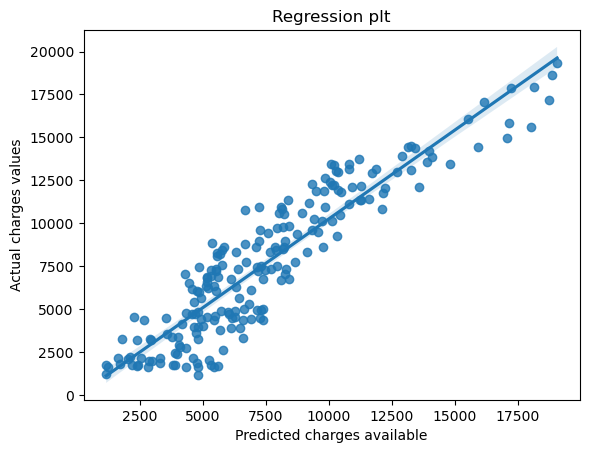

In [89]:
sns.regplot(x=predictions,y=Y_test)
plt.xlabel("Predicted charges available")
plt.ylabel("Actual charges values")
plt.title("Regression plt")
plt.show()